In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score
import joblib

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [4]:
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [5]:
y

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [6]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
data = pd.concat([X,y], axis=1)
data_cleaned = data.dropna()

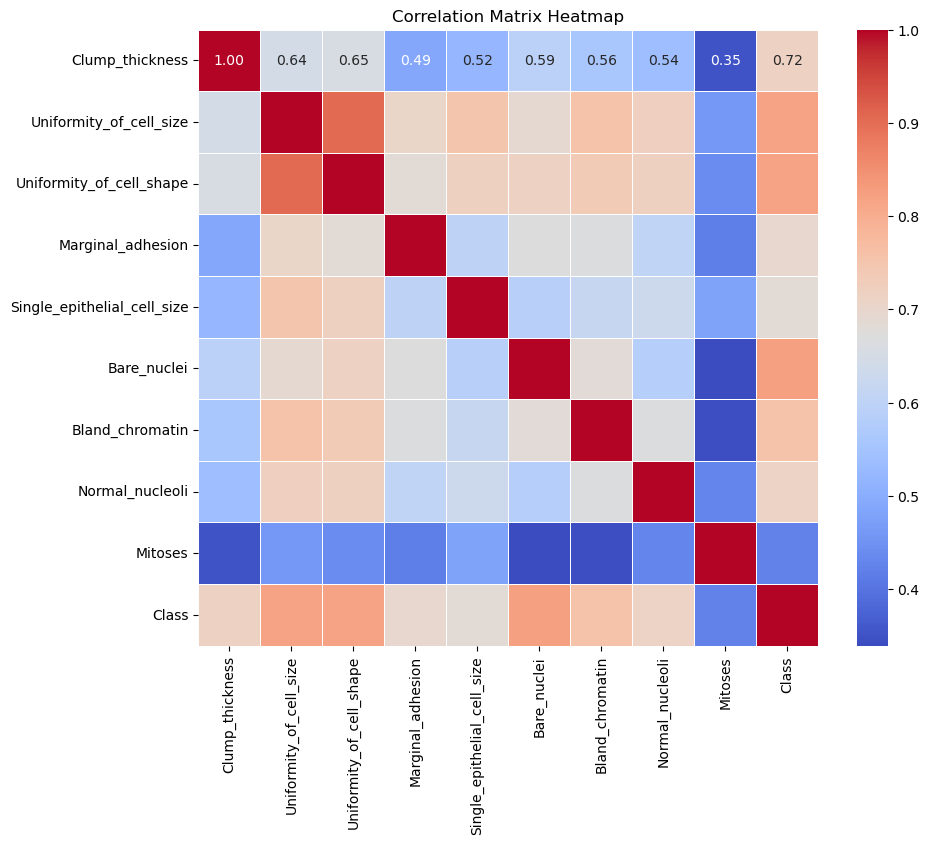

In [8]:
correlation_mat = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
X_cleaned = data_cleaned.drop(columns=['Class'])
y_cleaned = data_cleaned['Class']

In [10]:
data_cleaned

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [11]:
correlation_matrix = X_cleaned.corr()

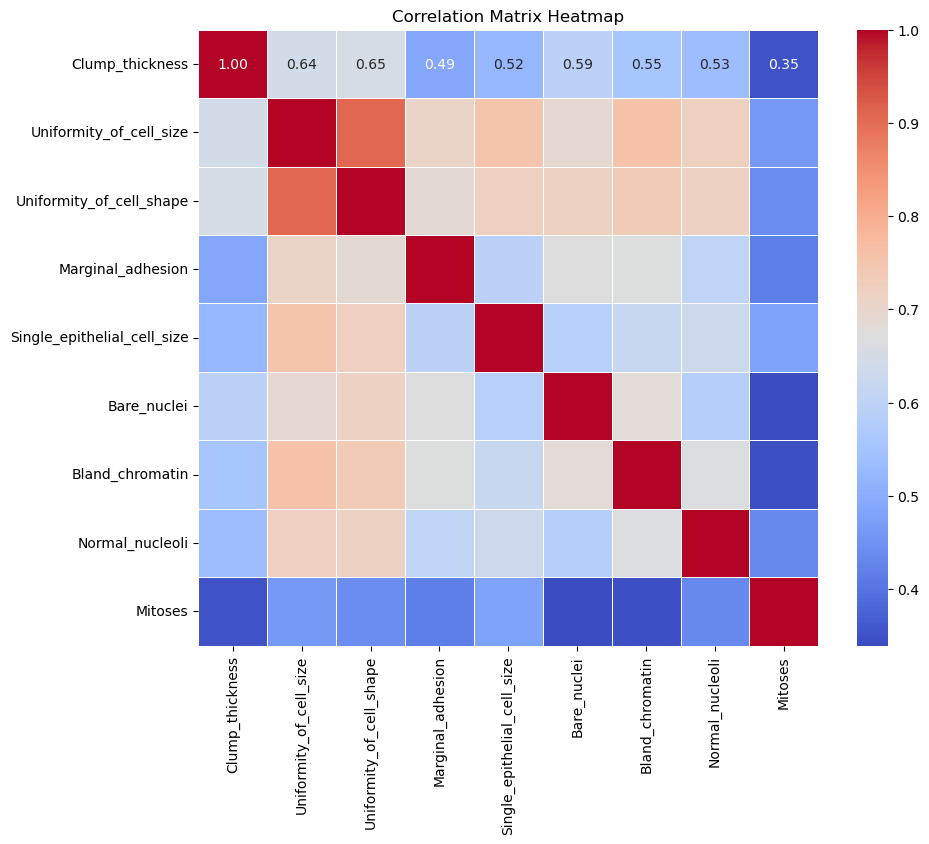

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
X_cleaned_=X_cleaned.drop(columns=['Uniformity_of_cell_shape'])

In [14]:
X_cleaned_.head()

,Clump_thickness,Uniformity_of_cell_size,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,2,1.0,3,1,1
1,5,4,5,7,10.0,3,2,1
2,3,1,1,2,2.0,3,1,1
3,6,8,1,3,4.0,3,7,1
4,4,1,3,2,1.0,3,1,1


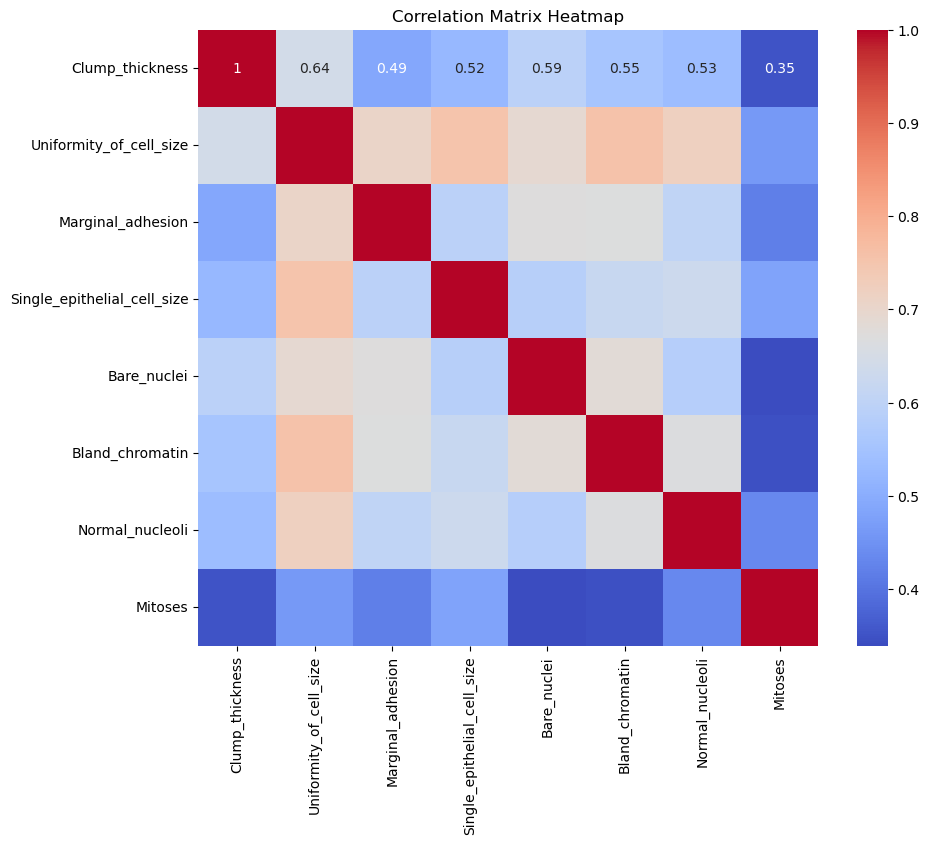

In [15]:
correlation_matrix = X_cleaned_.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_cleaned_,y_cleaned, test_size = 0.2, random_state=2)

In [17]:
X_test.head()

,Clump_thickness,Uniformity_of_cell_size,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
109,6,5,4,3,9.0,7,8,3
210,8,10,10,5,10.0,8,10,6
647,1,1,3,2,1.0,1,1,1
569,10,10,10,6,5.0,10,3,1
309,3,1,1,2,5.0,5,1,1


In [82]:
print(X.shape, X_train.shape, X_test.shape)

(699, 9) (546, 8) (137, 8)


### Logistic Regression

In [83]:
classifier_logistic = LogisticRegression(solver='liblinear', random_state=2)

In [84]:
classifier_logistic.fit(X_train, Y_train)

LogisticRegression(random_state=2, solver='liblinear')

In [85]:
Y_prediction = classifier_logistic.predict(X_test)
training_data_accuracy = accuracy_score(Y_prediction, Y_test)

In [86]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.927007299270073


In [87]:
cm = confusion_matrix(Y_test,Y_prediction)

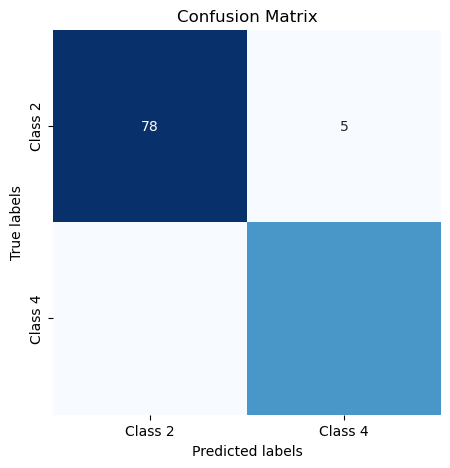

In [79]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
tick_labels = ['Class 2', 'Class 4']  
plt.xticks(np.arange(2) + 0.5, tick_labels)
plt.yticks(np.arange(2) + 0.5, tick_labels)
plt.show()

In [74]:
precision = precision_score(Y_test, Y_prediction, pos_label=4)
recall = recall_score(Y_test, Y_prediction, pos_label=4)
f1 = f1_score(Y_test, Y_prediction, pos_label=4)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9074074074074074
Recall: 0.9074074074074074
F1 Score: 0.9074074074074074


### SVM Model

In [88]:
classifier_svm = svm.SVC(kernel='linear')

In [89]:
classifier_svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [90]:
Y_prediction = classifier_svm.predict(X_test)
training_data_accuracy = accuracy_score(Y_prediction, Y_test)

In [91]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.948905109489051


In [92]:
precision = precision_score(Y_test, Y_prediction, pos_label=4)
recall = recall_score(Y_test, Y_prediction, pos_label=4)
f1 = f1_score(Y_test, Y_prediction, pos_label=4)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9272727272727272
Recall: 0.9444444444444444
F1 Score: 0.9357798165137615


### RandomForest

In [97]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

In [98]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [99]:
Y_prediction = rf_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction)

In [100]:
print("Accuracy:", accuracy)

Accuracy: 0.9416058394160584


In [101]:
precision = precision_score(Y_test, Y_prediction, pos_label=4)
recall = recall_score(Y_test, Y_prediction, pos_label=4)
f1 = f1_score(Y_test, Y_prediction, pos_label=4)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.896551724137931
Recall: 0.9629629629629629
F1 Score: 0.9285714285714286


### KNN

In [102]:
classifier_KNN = KNeighborsClassifier(n_neighbors=3)

In [103]:
classifier_KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [104]:
Y_prediction = classifier_KNN.predict(X_test)

In [105]:
accuracy = accuracy_score(Y_test,Y_prediction)
print("accuracy:", accuracy)

accuracy: 0.9416058394160584


### Saving the model

In [34]:
joblib.dump(classifier_logistic,'logistic_reg_model.joblib')

['logistic_reg_model.joblib']

In [35]:
model = joblib.load('logistic_reg_model.joblib')

In [36]:
predictions = model.predict(X_test)
predictions

array([2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 4, 2], dtype=int64)

In [37]:
input_data = (5,10,3,7,3.0,8,10,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 2):
  print('you not have cancer')
else:
  print('you have cancer')

[4]
you have cancer


C:\Users\Acer\anaconda3\envs\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
for column in X_cleaned_.columns:
    print(column)

Clump_thickness
Uniformity_of_cell_size
Marginal_adhesion
Single_epithelial_cell_size
Bare_nuclei
Bland_chromatin
Normal_nucleoli
Mitoses
